In [2]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib_venn import venn3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import pickle


In [9]:
G_random_erdos = nx.erdos_renyi_graph(170,0.12571,seed=0)
G_random_erdos.name="Random"
print(G_random_erdos)
print(nx.density(G_random_erdos))

Graph named 'Random' with 170 nodes and 1840 edges
0.1280891054646711


In [12]:
PCD_CCN = nx.read_edgelist('1 output\Consensus PCD')
PCD_CCN.name = "PCD CCN"
print(PCD_CCN)

CHR_CCN = nx.read_edgelist('1 output\Consensus CHR')
CHR_CCN.name = "CHR CCN"
print(CHR_CCN)

DNA_CCN = nx.read_edgelist('1 output\Consensus DNA')
DNA_CCN.name = "DNA CCN"
print(DNA_CCN)

Graph named 'PCD CCN' with 170 nodes and 1840 edges
Graph named 'CHR CCN' with 162 nodes and 1297 edges
Graph named 'DNA CCN' with 233 nodes and 4616 edges


# Betti 2 Impact

In [4]:
report={}
name='Random Network'
for node in sorted(G_random_erdos.nodes):
    with open('4 output/'+name+'-'+str(node)+'.pkl',mode='rb') as f:
        barcode=pickle.load(f)
        dim0=len([bar for bar in barcode if bar[0]==0])
        dim1=len([bar for bar in barcode if bar[0]==1])
        dim2=len([bar for bar in barcode if bar[0]==2])

    report[node]=[dim0,dim1,dim2]
impact_df=pd.DataFrame(report).T

In [41]:
impact_df["impact"]=impact_df[2].max()-impact_df[2]

In [45]:
impact_df

,0,1,2,impact
0,169,165,34,5
1,169,168,34,5
2,169,169,31,8
3,169,166,32,7
4,169,168,35,4
...,...,...,...,...
165,169,158,39,0
166,169,158,39,0
167,169,166,38,1
168,169,167,34,5


In [43]:
pd.DataFrame(impact_df["impact"].value_counts()).sort_index()

,count
impact,
0,24
1,32
2,24
3,26
4,13
5,12
6,8
7,13
8,8


<Axes: ylabel='Count'>

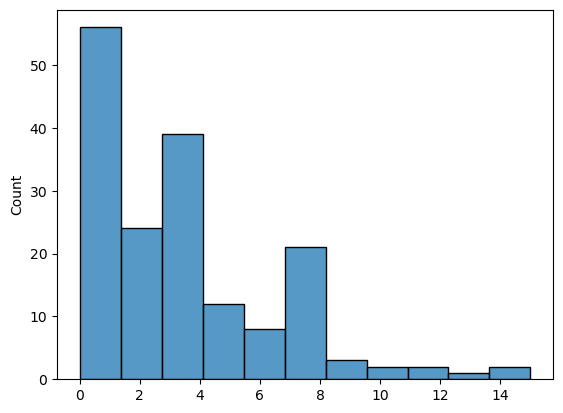

In [49]:
impactValues=impact_df["impact"].sort_values().values
sns.histplot(impactValues) 

<Axes: ylabel='Count'>

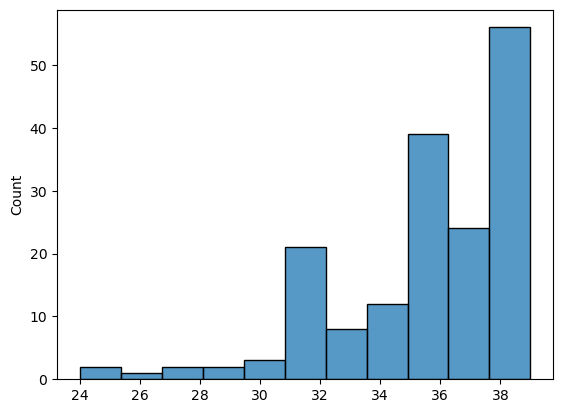

In [24]:
impactValues=list(impact_df.sort_values(by=[2])[2])
sns.histplot(impactValues) 

# Centrality Measures

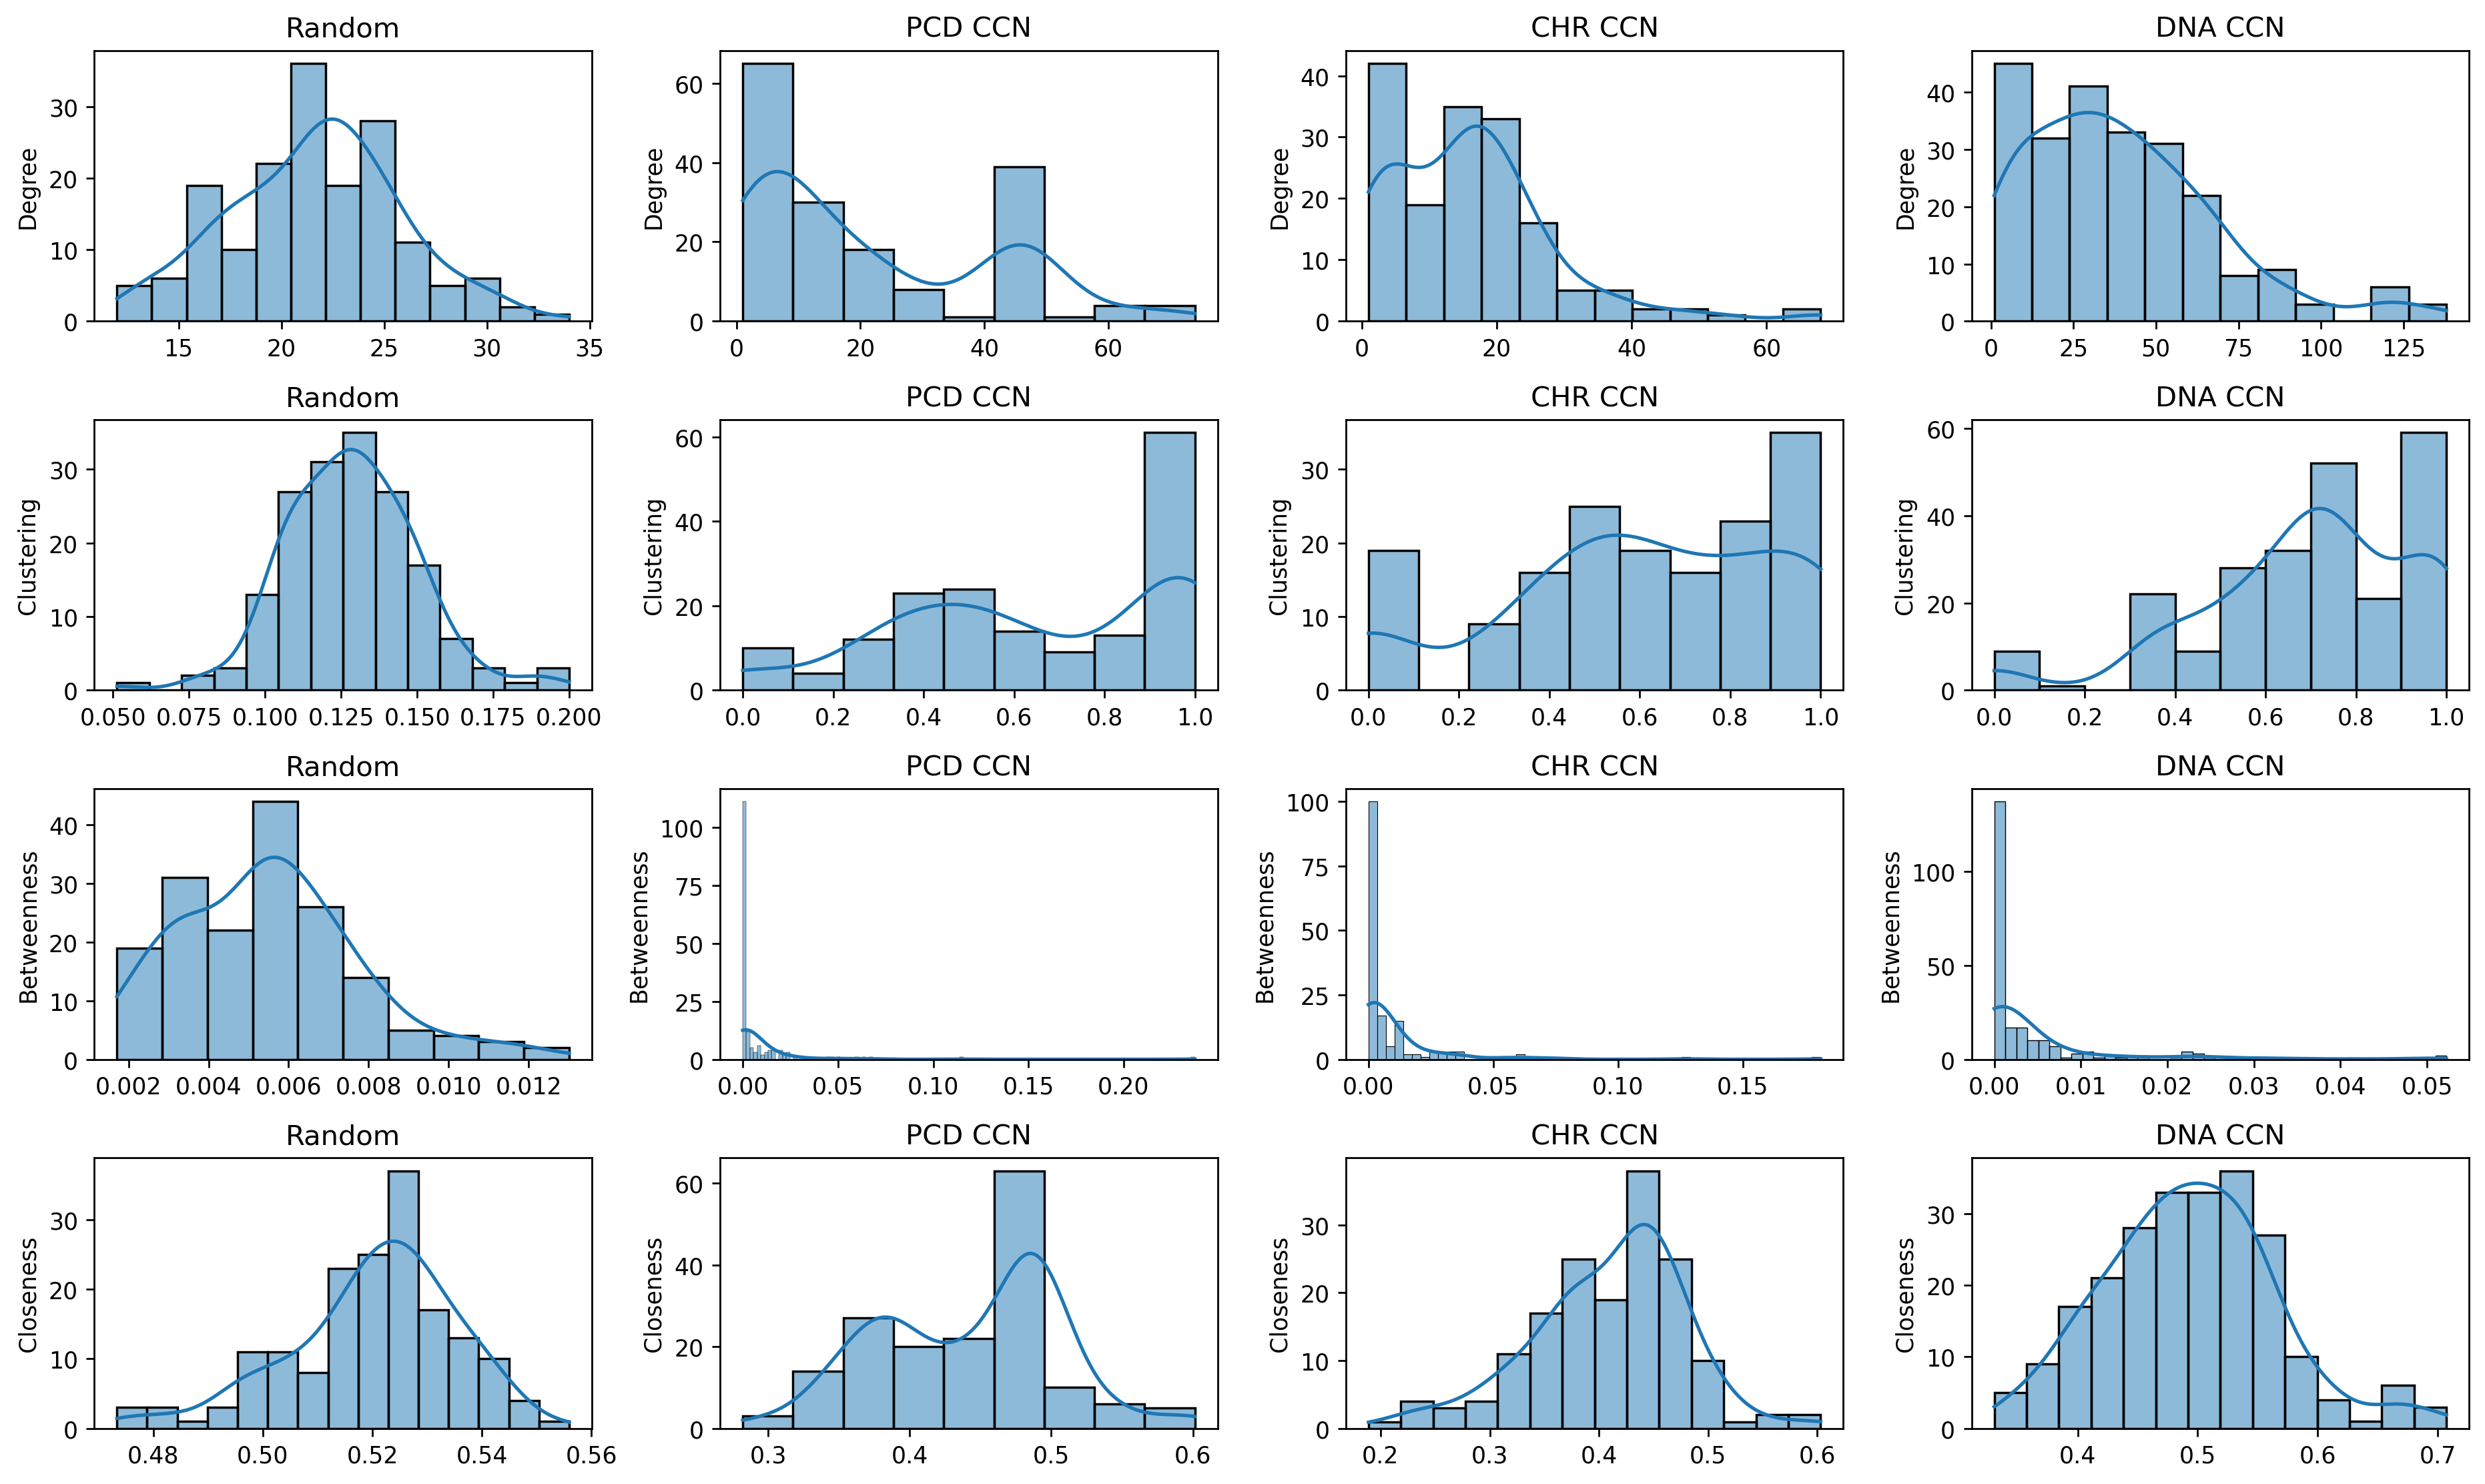

In [22]:
# Define a function to create and analyze a network
def analyze_network(G):
    # Calculate degree, clustering, betweenness, and closeness centrality
    degree = dict(G.degree())
    clustering = nx.clustering(G)
    betweenness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)

    return {"Degree":degree, "Clustering":clustering, "Betweenness":betweenness, "Closeness":closeness}

# Create four networks
network_data = {}
for G in [G_random_erdos,PCD_CCN,CHR_CCN,DNA_CCN]:
    network_data[G.name]=analyze_network(G)

# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 9),dpi=250)

# Iterate through the measures and networks
measures = ["Degree", "Clustering", "Betweenness", "Closeness"]
networksNames=["Random","PCD CCN","CHR CCN","DNA CCN"]

for i, measure_name in enumerate(measures):
    for j,netName in enumerate(networksNames):
        ax = axes[i, j]

        data = list(network_data[netName][measure_name].values())
        sns.histplot(data, kde=True, ax=ax)  # Use seaborn for KDE plot
        ax.set_title(netName)
        ax.set_ylabel(measure_name)
        
plt.tight_layout()
plt.show()